# **INTERNSHIP TASK 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Loading the CSV AND EXCEL FILES#


from google.colab import drive
drive.mount('/content/drive')
df_site = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fyttlyf_Website_Data.xlsx")
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fico (1).csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/region.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DESCRIBING THE FICO CSV
print(df1)
print(df1.describe())
print(df1.shape)

        acct_id FICO
0             1  768
1             2  850
2             3  677
3             4  843
4             5  796
...         ...  ...
100008    99996  NaN
100009    99997  NaN
100010    99998  NaN
100011    99999  SSS
100012   100000  NaN

[100013 rows x 2 columns]
             acct_id
count  100013.000000
mean    49996.449842
std     28868.457180
min         1.000000
25%     24999.000000
50%     49994.000000
75%     74997.000000
max    100000.000000
(100013, 2)


# **FICO CSV FILE**
The data has some missing values which needs to be identified under the column FICO. Through the following code we point out all the rows with missing values

In [ ]:
missing_data =  df1[df1['FICO'].isnull()]
print(missing_data)
#The no of rows in missing data

print("The number of rows with missing data-",missing_data.shape[0])

        acct_id FICO
10           11  NaN
17           18  NaN
40           41  NaN
42           43  NaN
43           44  NaN
...         ...  ...
100007    99995  NaN
100008    99996  NaN
100009    99997  NaN
100010    99998  NaN
100012   100000  NaN

[29615 rows x 2 columns]
The number of rows with missing data- 29615


# CATEGORISING THE FICO CREDIT SCORE
The FICO credit score can be categorised in following sub groups-


*  CATEGORY-: Missing Values(for our convenience let us take it 0)
*  CATEGORY 1: score less than 500
*  CATEGORY 2: score between 500(including) and 600 (excluding)

*   CATEGORY3:Score between 600(including) and 700(excluding)
*   CATEGORY4:Score between 700(including) and 800(excluding)
*   CATEG0RY5:Score between 800(including) and 900(excluding)


According to Investopedia,FICO is a major analytics software company that provides products and services to both businesses and consumers. The company is best known for producing the most widely used consumer credit scores that financial institutions use in deciding whether to lend money or issue credit.

The overall FICO score range is between 300 and 850. In general, scores in the 670 to 739 range indicate “good” credit history, and most lenders will consider this score favorable. In contrast, borrowers in the 580 to 669 range may find it difficult to obtain financing at attractive rates.


 





In [ ]:
#We have already displayed all the missing values rows,now we move forward to the second category
#First we drop the rows strings and NaN to get clean_data

df1.drop(df1[df1['FICO'] =="SSS"].index,inplace= True)
df1.drop(df1[df1['FICO'] =="AA"].index, inplace = True)
df1.dropna(inplace=True)
print(df1)













        acct_id  FICO
0             1   768
1             2   850
2             3   677
3             4   843
4             5   796
...         ...   ...
99998     99986   836
99999     99987   850
100001    99989   850
100002    99990   830
100004    99992   850

[70396 rows x 2 columns]


In [ ]:

#convertimg to int#
df1['FICO'] = df1['FICO'].astype(int)
df1.dtypes


#for category 1#
cat1 = df1.loc[df1['FICO']<500]
cat1_num = cat1.shape[0]
print("no of customers in range :400<=FICO<500=",cat1_num)

#for category 2#
cat2 =  df1.loc[(df1['FICO']>=500)&(df1['FICO']<600)]
cat2_num = cat2.shape[0]
print("no of customers in range :500<=FICO<600=",cat2_num)

#for category 3#
cat3 =  df1.loc[(df1['FICO']>=600)&(df1['FICO']<700)]
cat3_num = cat3.shape[0]
print("no of customers in range :600<=FICO<700=",cat3_num)

#for category 4#
cat4 =  df1.loc[(df1['FICO']>=700)&(df1['FICO']<800)]
cat4_num = cat4.shape[0]
print("no of customers in range :700<=FICO<800=",cat4_num)

#for category 5#
cat5 =  df1.loc[(df1['FICO']>=800)&(df1['FICO']<900)]
cat5_num = cat5.shape[0]
print("no of customers in range :800<=FICO<900=",cat5_num)





no of customers in range :400<=FICO<500= 64
no of customers in range :500<=FICO<600= 977
no of customers in range :600<=FICO<700= 6780
no of customers in range :700<=FICO<800= 25642
no of customers in range :800<=FICO<900= 36933


# HISTOGRAM

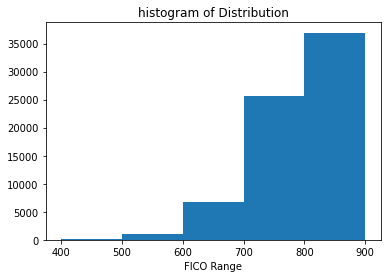

In [ ]:

a = df1['FICO']
plt.hist(a, bins = [400,500,600,700,800,900])
plt.title("histogram of Distribution")
plt.xticks([400,500,600,700,800,900])
plt.xlabel('FICO Range')
plt.ylabel('')
plt.show()


# PIE CHART

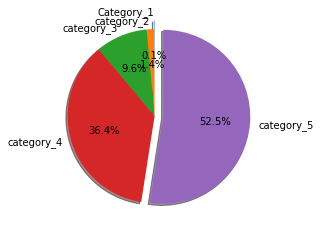

In [ ]:
categ= ['Category_1', 'category_2','category_3', 'category_4', 'category_5']
data = [cat1_num, cat2_num, cat3_num, cat4_num, cat5_num]

explode = (0.1,0,0,0,0.1)
fig1,ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels= categ, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()


 

**REGION** **FILE**

In [ ]:
#TEMP TABLE#
df_inner = pd.merge(df1, df2, on='acct_id', how='inner')
print(df_inner)



#creating a dataframe of Region and avergae FICO Score#
regions =  df2['region'].unique()

dict1= {}

for i in regions:
  region1 = df_inner[df_inner.region.values==i]
  total_1 = region1['FICO'].mean()
  dict1[i]= total_1

d = {'Region': list(dict1.keys()),'Avg_FICO_Score': list(dict1.values())}
dataframe = pd.DataFrame(data=d)
print(dataframe)

#dropping the highest and lowest FICO ABG SCORE#
dataframe.drop(dataframe[dataframe.Avg_FICO_Score == dataframe.Avg_FICO_Score.min()].index,inplace= True)
dataframe.drop(dataframe[dataframe.Avg_FICO_Score == dataframe.Avg_FICO_Score.max()].index,inplace=  True)




       acct_id  FICO        region
0            1   768      New York
1            2   850        Dallas
2            3   677   Los Angeles
3            4   843       Chicago
4            5   796  Philadelphia
...        ...   ...           ...
70564    99986   836       Phoenix
70565    99987   850   Los Angeles
70566    99989   850   Los Angeles
70567    99990   830       Chicago
70568    99992   850   Los Angeles

[70569 rows x 3 columns]
         Region  Avg_FICO_Score
0      New York      785.081154
1        Dallas      782.102021
2   Los Angeles      785.694113
3       Chicago      785.638187
4  Philadelphia      785.783084
5   San Antonio      784.508277
6       Houston      786.007501
7     Charlotte      785.154280
8       Phoenix      788.156762
9     San Diego      784.081618


In [ ]:
print("Regions with second highest and lowest AVG FICO SCORE")
print(dataframe[dataframe.Avg_FICO_Score == dataframe.Avg_FICO_Score.max()])
print(dataframe[dataframe.Avg_FICO_Score == dataframe.Avg_FICO_Score.min()])




Regions with second highest and lowest AVG FICO SCORE
    Region  Avg_FICO_Score
6  Houston      786.007501
      Region  Avg_FICO_Score
9  San Diego      784.081618


# TASK 3

In [ ]:
#PAYLOAD KEY-VALUE COLUMNS#


event= df_site['evnt_dt']
visitor = df_site['visitor_id']

df_key, df_id = df_site['payload'].str.split('&', 1).str

d = {'event_dt': list(event),'visitor_ID': list(visitor),'Payload_Key': df_key,'Payload_Val':df_id}
print(pd.DataFrame(data=d))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys


         event_dt                                visitor_ID  \
0      2021-02-02      gc1f62e501790gcd045c35gccgc4fcfd9e0d   
1      2021-02-02   gc5gcd19131790gc1d2d7gcgc4582fcgc57gc98   
2      2021-02-02      3004cgc811770gcd0059ff44fcffdgc0gc27   
3      2021-02-02       gc463dcf41790gcd045gc51270efcd938d7   
4      2021-02-02    gc623401e1790gc2758gcdgc164gcfcgc26737   
...           ...                                       ...   
101324 2021-02-02       92gcc37191790gcd047198e08dfd6gc1574   
101325 2021-02-02  gc2gc4dgcgcgc1790gcd005gc2gcc519fc0046c3   
101326 2021-02-02    gc22egc80c1790gcd0058d8gc32gcfc037gc39   
101327 2021-02-02       gc6747ccc1790gc1d7e0370d4efcgcf3592   
101328 2021-02-02        gc395d3fc1770gc12d68e6802effffffff   

                                              Payload_Key  \
0           isp_mozioxile_ckijrrier=Deutsche Telekom kijG   
1                isp_mozioxile_ckijrrier=O2 Deutschlkijnd   
2              isp_mozioxile_ckijrrier=PlusServer GmzioxH   

In [ ]:
# GEO-ENTRY LEVEL CTR#

countries = df_site['geo_cntry'].unique()

df_click = df_site[df_site['Event']== "Click"]
df_imp = df_site[df_site['Event']== "Impression"]

gf1= df_click.groupby('geo_cntry')
gf2 = df_imp.groupby('geo_cntry')

CTR_values = []
for i in countries:
 gf1_i = gf1.get_group(i)
 gf2_i = gf2.get_group(i)
 click_session = len(gf1_i['sessn_id'].unique())
 imp_session   = len(gf2_i['sessn_id'].unique())
 CTR = (click_session/imp_session)*100
 CTR_values.append(CTR)


d = {'Country': list(countries),'CTR %': list(CTR_values)}
print(pd.DataFrame(data=d))

         Country      CTR %
0         France  36.569822
1  United States  35.918877


In [ ]:
# Click sessions for different Browsers#

browsers = df_site['browser_type'].unique()

for i in browsers:
  print("Count of clicks for browser ->",i,df_site[(df_site['browser_type']==i)&(df_site['Event']=="Click")]['Event'].count())



Count of clicks for browser -> Safari 7322
Count of clicks for browser -> Firefox 2805
Count of clicks for browser -> Chrome Mobile 10510
Count of clicks for browser -> Chrome 8784
Count of clicks for browser -> Edge 2473
Count of clicks for browser -> Samsung Browser 1410
Count of clicks for browser -> # 14
Count of clicks for browser -> Internet Explorer 165
Count of clicks for browser -> Opera Touch 10
Count of clicks for browser -> Android Browser 16
Count of clicks for browser -> Iron 2
Count of clicks for browser -> MIUI Browser 73
Count of clicks for browser -> UC Browser 9
Count of clicks for browser -> Opera Mobile 111
Count of clicks for browser -> Opera 24
Count of clicks for browser -> nan 0
Count of clicks for browser -> HeyTap Browser 3
Count of clicks for browser -> Puffin 4
Count of clicks for browser -> Chromium 0
Count of clicks for browser -> BlackBerry Browser 3
Count of clicks for browser -> Opera Mini 2
Count of clicks for browser -> Amazon Silk 27
Count of clicks